In [1]:
'''
    Preprocessing the labeled_Aarya dataset and split into train, test, validation.
'''
import numpy as np
import pandas as pd
import shutil, time, os, requests, random, copy
import PIL
from PIL import Image
import matplotlib.pyplot as plt 
from tqdm import tqdm
import shutil
from imutils import paths

In [2]:
all_images = 'data/all_images'
train_dir = 'data/train'
val_dir = 'data/validation'
test_dir = 'data/test'

In [ ]:
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

In [9]:
for label in os.listdir(all_images):
    label_path = all_images + '/' + label
    os.mkdir(train_dir + '/' + label)
    os.mkdir(val_dir + '/' + label)
    os.mkdir(test_dir + '/' + label)
    for breed in os.listdir(label_path):
        breed_path = label_path + '/' + breed
        image_paths = list(paths.list_files(breed_path))
        for i in range(0, len(image_paths)):
            if(i%3 == 0):
                if(i%2 == 0):
                    img = Image.open(image_paths[i]).convert("RGB")
                    img.save(val_dir + '/' + label + '/' + breed + str(i) + ".jpeg", "jpeg")
                    #shutil.copy(image_paths[i], val_dir + '/' + label)
                else:
                    img = Image.open(image_paths[i]).convert("RGB")
                    img.save(test_dir + '/' + label + '/' + breed + str(i) + ".jpeg", "jpeg")
                    #shutil.copy(image_paths[i], test_dir + '/' + label)
            else:
                img = Image.open(image_paths[i]).convert("RGB")
                img.save(train_dir + '/' + label + '/' + breed + str(i) + ".jpeg", "jpeg")
                #shutil.copy(image_paths[i], train_dir + '/' + label)

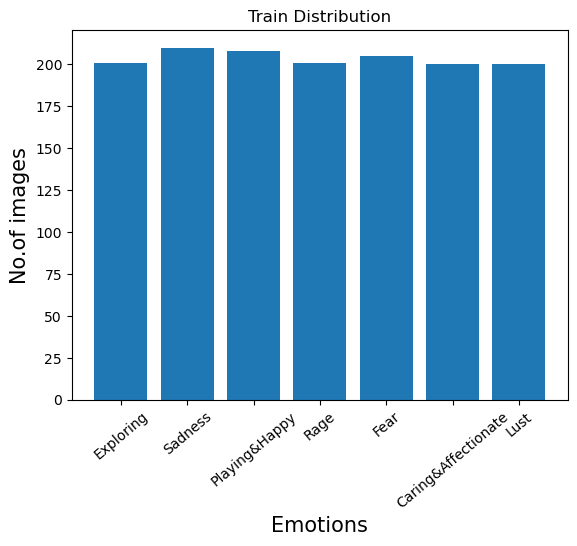

In [10]:
train_dict = {}
for label in os.listdir(train_dir):
    label_path = train_dir + '/' + label
    num = len(list(paths.list_files(label_path)))
    train_dict[label] = num

x = list(train_dict.keys())
y = list(train_dict.values())
plt.xlabel("Emotions", fontsize = 15)
plt.ylabel("No.of images", fontsize = 15)
plt.title("Train Distribution")
plt.bar(x, y)
plt.xticks(rotation = 40)
plt.show()

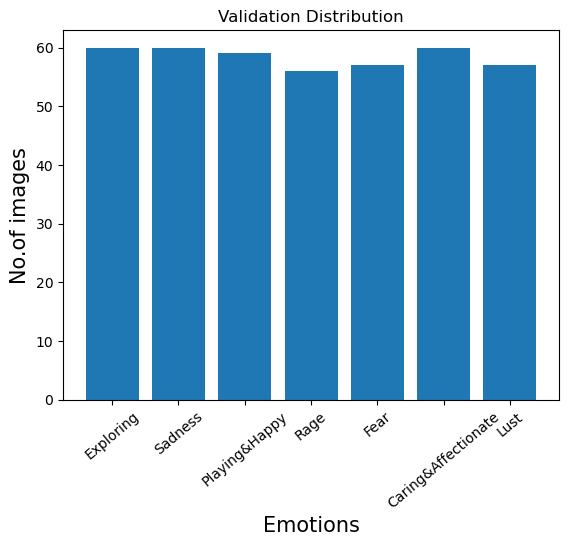

In [11]:
val_dict = {}
for label in os.listdir(val_dir):
    label_path = val_dir + '/' + label
    num = len(list(paths.list_files(label_path)))
    val_dict[label] = num

x = list(val_dict.keys())
y = list(val_dict.values())
plt.xlabel("Emotions", fontsize = 15)
plt.ylabel("No.of images", fontsize = 15)
plt.title("Validation Distribution")
plt.bar(x, y)
plt.xticks(rotation = 40)
plt.show()

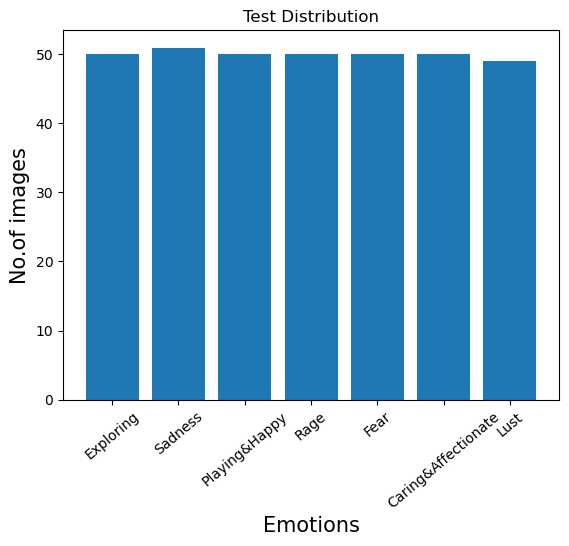

In [12]:
test_dict = {}
for label in os.listdir(val_dir):
    label_path = test_dir + '/' + label
    num = len(list(paths.list_files(label_path)))
    test_dict[label] = num

x = list(test_dict.keys())
y = list(test_dict.values())
plt.xlabel("Emotions", fontsize = 15)
plt.ylabel("No.of images", fontsize = 15)
plt.title("Test Distribution")
plt.bar(x, y)
plt.xticks(rotation = 40)
plt.show()

In [26]:
breed_dict = {}
label_dict = {}
num_total = 0

In [27]:
for label in os.listdir(all_images):
    label_path = all_images + '/' + label
    num_label = 0
    for breed in os.listdir(label_path):
        breed_path = label_path + '/' + breed
        num_breed = len(list(paths.list_files(breed_path)))
        if(breed in breed_dict):
            breed_dict[breed] += num_breed
        else:
            breed_dict[breed] = num_breed
        num_label += num_breed
    num_total += num_label
    label_dict[label] = num_label

In [32]:
num_total

2184

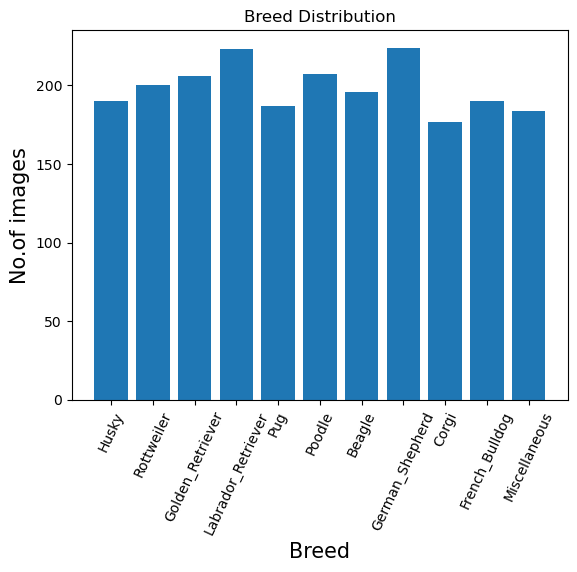

In [31]:
x = list(breed_dict.keys())
y = list(breed_dict.values())
plt.xlabel("Breed", fontsize = 15)
plt.ylabel("No.of images", fontsize = 15)
plt.title("Breed Distribution")
plt.bar(x, y)
plt.xticks(rotation = 65)
plt.show()

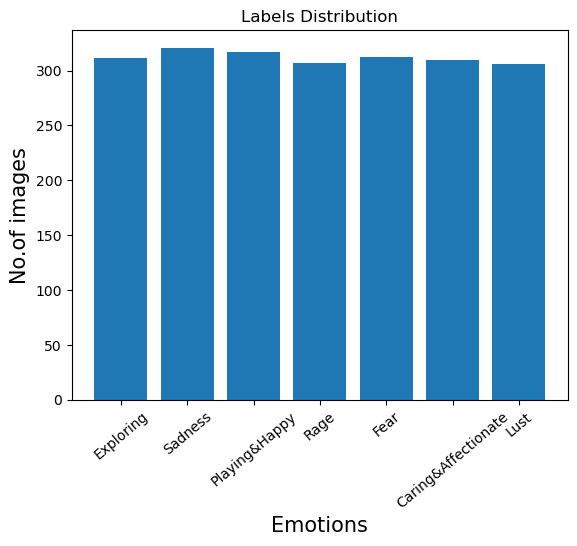

In [33]:
x = list(label_dict.keys())
y = list(label_dict.values())
plt.xlabel("Emotions", fontsize = 15)
plt.ylabel("No.of images", fontsize = 15)
plt.title("Labels Distribution")
plt.bar(x, y)
plt.xticks(rotation = 40)
plt.show()